In [35]:
#import the required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Graph color pallete
# Set a custom color palette
sns.set_palette("Set3", n_colors=3)

In [36]:
# Load the data
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [37]:
# Add an overweight column to the data
df['overweight'] = (df['weight'] / (df['height']/100)**2 > 25).astype(int)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [38]:
# Normalize the data
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df['alco'] = df['alco'].apply(lambda x: 0 if x == 0 else 1)
df['smoke'] = df['smoke'].apply(lambda x: 0 if x == 0 else 1)
df['active'] = df['active'].apply(lambda x: 0 if x == 0 else 1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [39]:
# Clean the data
df = df[(df['ap_lo'] <= df['ap_hi'])]
df = df[(df['height'] >= df['height'].quantile(0.025))]
df = df[(df['height'] <= df['height'].quantile(0.975))]
df = df[(df['weight'] >= df['weight'].quantile(0.025))]
df = df[(df['weight'] <= df['weight'].quantile(0.975))]

In [40]:
# Convert the data into long format
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'alco', 'active', 'smoke'], var_name='Feature', value_name='Value')

C:\Users\Tim Namathe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


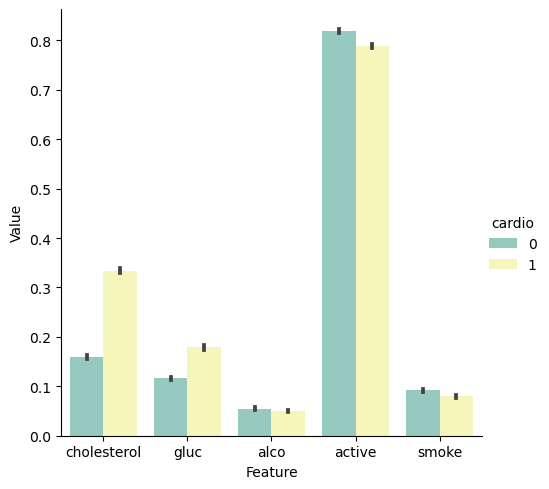

In [41]:
# Create a chart that shows the value counts of the categorical features using seaborn's catplot()
g = sns.catplot(x='Feature', y='Value', hue='cardio', kind='bar', data=df_long)
plt.show()

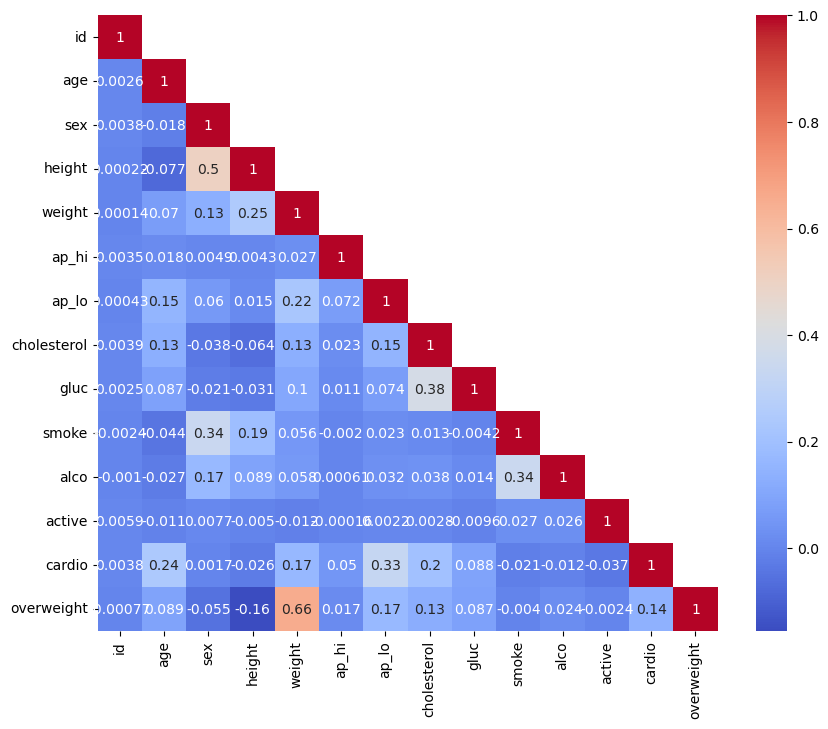

In [42]:
# Create a correlation matrix using the dataset
corr = df.corr()

# Plot the correlation matrix using seaborn's heatmap()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(corr), k=1))
plt.show()